Definimos las variables con las que se trabajara el ejercicio

X(0) = 1
X'(0) = 0


Solución de EDP por medio de dos EDOs simultaneas ordinarias siguiendo los pasos de Poyla. La EDP fue adelantada hasta la etapa de separación de variables.

Paso 1.
En este paso notamos que requerimos la solución a dos ecuaciones diferenciales ordnarias relacionadas, es decir requerimos tanto la solución de X' como de X, ambas soluciones en el dominio espacial de x. Para esto entonces recurrimos a una solución numérica de dos ecuaciones simultaneas por medio de el metodo de Runge-Kutta 4 en la librería de scipy como integrate.solve_ivp con el parametro method='RK45' para que la solución preferible del sistema. Definimos entonces las EDOs simultaneas por medio de la función de python EDO donde retornará un arreglo que será equivalente a un arreglo smultaneo a resolver de X(x) y de X'(x). Es importante notar que en el enunciado del problema se nos dan las condiciones frontera e iniciales adecuadas para resolver numéricamente este tipo de ecuación diferencial según la tabla dada por Landau, Paez, etc.

In [48]:
#Llamaremos a X'' como y[2], X' como y[1] y x como y[0]

def EDO(x, y):
    '''

    :param x: Este parametro es necesario contemplarlo para la solucion de la biblioteca de scipy, sin embargo no es utilizada en las EDOs
    :param y: son los valores de arreglo para las EDOs simultaneas
    :return: Devuelve un arreglo de las funciones dadas para resolver
    '''
    k = 1
    return [y[1],  -k**2 * y[0]]

Paso 2.
Configuramos el plan de solución de con una lista de tareas a resolver que iremos adelantando y trabajando en el siguiente orden correspondiente:

1- Realizar la separación de variables
2- Solucionar cada EDOs de forma simultanea
3- Definir el arreglo de ecuaciones a resolver
4- Programar la solución por medio de la librería de solve_ivp usando el metodo de Runge-Kuuta 45
5- Guardar los resultados numéricos en listas para encontrar errores
6- Notar que solve_ivp grafica con menos puntos de los necesarios e iterar dicho código
7- Graficar ambas funciones en dominio espacial
8- Agregar rotulaciones
9- Comparar con la solución dada por el profesor
10- Modificar e iterar el código hasta la depuración deseada

In [49]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt


def solucionEDO2(x0, xLimit, y01, y02, h = 0.1):
    '''

    :param x0: parametro del dominio espacial inicial
    :param xLimit: parametro de longitud espacial
    :param y01: condicion de Dirichlet dada por el enunciado
    :param y02: condicion de Neumann dada por el enunciado
    :param h: parametro opcional del espaciado espacial entre soluciones de las ecuaciones
    :return: un arreglo de las soluciones EDO mas el dominio espacial del problema
    '''
    resultado = integrate.solve_ivp(fun=EDO, t_span=[x0, xLimit], y0=[y02, y01], method='RK45', t_eval = np.arange(x0, xLimit, h))
    return [resultado.y[0], resultado.y[1], resultado.t]


Paso 3.
Ejecución del plan:
Una vez implementado las etapas anteriores del código debemos almacenar los valores dados por medio de listas y separarlos para poder realizar su graficación como se muestra a continuación. Graficamos en dominio espacial en los puntos seleccionados por t_eval del parámetro de solve_ivp de la librería de scipy.integrate. Iteramos los puntos deseados y comparamos como una función sí es la derivada de la otra ya que en pendiente 0,la amplitud es máxima.

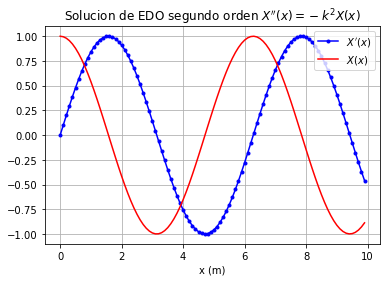

In [50]:
#Guardamos las listas de los resultados a graficar en las siguientes listas
#ys contiene toda la informacion, y0S es la solucion a X(0) y y1S es la solucion a X'(0)
ys = solucionEDO2(0, 10, 1, 0)
y0S = ys[0]
y1S = ys[1]

#Graficamos las soluciones segun lo solicitado, noytyamos el dominio espacial es dado por el tercer obejeto en la lista de ys
fig = plt.figure()
plt.plot( ys[2],y0S, 'b.-', label="$X'(x)$")
plt.plot( ys[2],y1S, 'r-', label="$X(x)$")
plt.xlabel("x (m)")
plt.grid(True)
plt.title("Solucion de EDO segundo orden $X''(x) = -k^2X(x)$")
plt.legend(loc='upper right')
plt.show()

Paso 4.
Mirando hacia atras podemos obsevar como la solción graficada es para un ojo humano no calibrado es literarmente igual a la solución que normalmente estamos acostumbrados de una onda electromagnética. Por otro lado al realizar una separación de variables es posible solucionar la parte temporal. Esto queda como una posible iteración a futuro para seguir practicando con dichas soluciones.